## Necessary libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Control points

In [27]:
# Load of digitazed control points from Gen-6 plot, at 75ºF, and presentation (first 5 lines)

gen6 = pd.read_excel('gen6_75f.xlsx', sheet_name='gen6_75f')
gen6.head(5)

,rw,cw,salw
0,0.040869,24.468531,270000
1,0.040869,24.468531,250000
2,0.044783,22.329795,200000
3,0.049073,20.378001,170000
4,0.056425,17.722766,140000


In [37]:
# Statistical summary of the control points

gen6.describe()

,rw,cw,salw
count,32.000000,32.000000,32.00000
mean,1.619892,6.492453,52981.25000
std,2.371236,8.011709,76140.01719
min,0.040869,0.116372,600.00000
25%,0.095830,0.503452,2750.00000
50%,0.457210,2.200179,13000.00000
75%,2.038046,10.463559,72500.00000
max,8.593133,24.468531,270000.00000


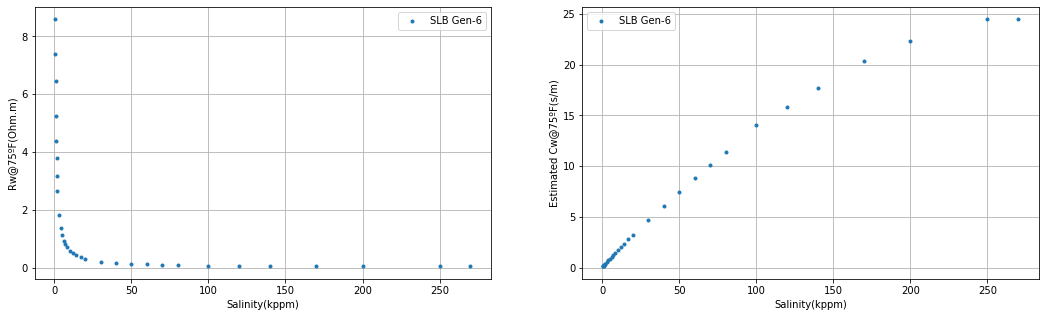

In [51]:
# Plots of the control points

plt.figure(figsize=(18,5))

plt.subplot(121)
plt.plot(gen6['salw']/1000, gen6['rw'], '.', label="SLB Gen-6")
# plt.xlim(0,300)
# plt.ylim(0,35)
plt.legend()
plt.grid(True)
plt.xlabel("Salinity(kppm)")
plt.ylabel("Rw@75ºF(Ohm.m)")

plt.subplot(122)
plt.plot(gen6['salw']/1000, gen6['cw'], '.', label="SLB Gen-6")
# plt.xlim(0,300)
# plt.ylim(0,35)
plt.legend()
plt.grid(True)
plt.xlabel("Salinity(kppm)")
plt.ylabel("Estimated Cw@75ºF(s/m)")

plt.show()

<center> Fig.1 - Control points from SLB Gen-6</center>

In [ ]:
## Salinities

The maximum salinity of the water is around 263,080 ppm (26.3 wt%) so values way above this limit are unreal. Just for verification purpose a collection (array) of salinities are created from 1 to 300,000 ppm (step of 10).

In [5]:
# Array of water salinity, from 1 to 300,000 ppm. 

WS = np.arange(1,300000,10)
print('Lenght WS:', len(WS))

Lenght WS: 30000


## Salinity to water resistivity

As the control points were taken only at 75º F, all the calculation were done at that reference temperature.

### By Crain (C)

In [40]:
# Resistivity by Cain, from salinity (ppm)

RW75C = ((400000 / 75) / WS) ** 0.88
pd.DataFrame(RW75C).describe()

,0
count,30000.000000
mean,0.237549
std,11.158433
min,0.028834
25%,0.037141
50%,0.053065
75%,0.097659
max,1904.403104


In [41]:
# Conductivity by Crain

CW75C = 1/RW75C
pd.DataFrame(CW75C).describe()

,0
count,30000.000000
mean,18.447567
std,9.772095
min,0.000525
25%,10.239704
50%,18.844787
75%,26.924689
max,34.681379


### By Bateman-Konen (BK)

In [42]:
# Resistivity by Bateman-Konen, from salinity (ppm)

RW75BK = 0.0123 + (3647.5 / WS**0.955)
pd.DataFrame(RW75BK).describe()

,0
count,30000.000000
mean,0.316481
std,21.254530
min,0.033747
25%,0.040528
50%,0.053876
75%,0.092897
max,3647.512300


In [44]:
# Conductivity by Bateman-Konen

CW75BK = 1/RW75BK
pd.DataFrame(CW75BK).describe()

,0
count,30000.000000
mean,17.390867
std,8.324239
min,0.000274
25%,10.764584
50%,18.561256
75%,24.674581
max,29.632680


### By Kennedy (K)

Kennedy proposed a quadratic equation to get conductivity (CWK) from salinity in % (WSKP):

    CWK = a(WSKP - WS0)^2 + b(WSKP - WS0) + C0

In [45]:
# Conductivity by Kenndy, from salinity (%)

a = - 0.02922
b = - 0.0364
WS0 = 29.46518957
C0 = 24.30854

WSKP = WS/10000

CW75K = a*(WSKP- WS0)**2 + b*(WSKP - WS0) + C0
pd.DataFrame(CW75K).describe()

,0
count,30000.000000
mean,16.529207
std,7.275041
min,0.012514
25%,11.010125
50%,18.720707
75%,23.144257
max,24.319876


In [46]:
# Resistivity from Kennedy

RW75K = 1/CW75K
pd.DataFrame(RW75K).describe()

,0
count,30000.000000
mean,0.180063
std,1.289224
min,0.041119
25%,0.043207
50%,0.053417
75%,0.090825
max,79.913489


## Plots of salinity to estimated water resistivity

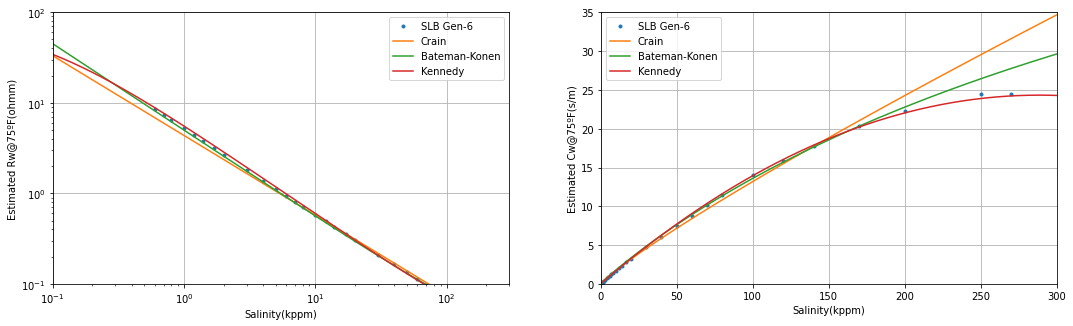

In [48]:
plt.figure(figsize=(18,5))

plt.subplot(121)
plt.loglog(gen6['salw']/1000, gen6['rw'], '.', label="SLB Gen-6")
plt.loglog(WS/1000, RW75C, label="Crain")
plt.loglog(WS/1000, RW75BK, label="Bateman-Konen")
plt.loglog(WS/1000, RW75K, label="Kennedy")
plt.legend()
plt.xlim(0.1,300)
plt.ylim(0.1,100)
plt.grid(True)
plt.xlabel("Salinity(kppm)")
plt.ylabel("Estimated Rw@75ºF(ohmm)")

plt.subplot(122)
plt.plot(gen6['salw']/1000, gen6['cw'], '.', label="SLB Gen-6")
plt.plot(WS/1000, CW75C, label="Crain")
plt.plot(WS/1000, CW75BK, label="Bateman-Konen")
plt.plot(WS/1000, CW75K, label="Kennedy")
plt.xlim(0,300)
plt.ylim(0,35)
plt.legend()
plt.grid(True)
plt.xlabel("Salinity(kppm)")
plt.ylabel("Estimated Cw@75ºF(s/m)")

plt.show()

<center> Fig.2 - Salinity to estimated water resistivity</center>

## Preliminary observation

The loglog plot of salinity vs estimated water resistivity doesn't help in the verification. The loglog plot of salinity vs estimated conductivity contributes more in that objective. In that plot is clear that models start to diverge above salinities of 160,000 ppm. Beyond that point only the Kennedy formula is the only that follow the control points. Let explore now the other way, from resistivity (or conductivity) to estimated salinity.